In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib.ticker import PercentFormatter
import seaborn as sns

# Data preparation 

In [5]:
!pwd

/home/elite/Documents/student-performance-with-alcohol/notebooks


In [9]:
df_mat = pd.read_csv('../data/student-mat.csv')
df_por = pd.read_csv('../data/student-por.csv')

In [10]:
df_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [11]:
df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [12]:
df_mat.shape, df_por.shape

((395, 33), (649, 33))

In [21]:
for col in df_mat.columns:
    print(df_mat[col].value_counts().to_frame())

    school
GP     349
MS      46
   sex
F  208
M  187
    age
16  104
17   98
18   82
15   82
19   24
20    3
22    1
21    1
   address
U      307
R       88
     famsize
GT3      281
LE3      114
   Pstatus
T      354
A       41
   Medu
4   131
2   103
3    99
1    59
0     3
   Fedu
2   115
3   100
4    96
1    82
0     2
          Mjob
other      141
services   103
at_home     59
teacher     58
health      34
          Fjob
other      217
services   111
teacher     29
at_home     20
health      18
            reason
course         145
home           109
reputation     105
other           36
        guardian
mother       273
father        90
other         32
   traveltime
1         257
2         107
3          23
4           8
   studytime
2        198
1        105
3         65
4         27
   failures
0       312
1        50
2        17
3        16
     schoolsup
no         344
yes         51
     famsup
yes     242
no      153
     paid
no    214
yes   181
     activities
yes     

In [31]:
df_mat['G3'].value_counts()

10    56
11    47
0     38
15    33
8     32
13    31
12    31
9     28
14    27
16    16
6     15
18    12
7      9
5      7
17     6
19     5
20     1
4      1
Name: G3, dtype: int64

In [36]:
df_mat['grade'] = pd.cut(df_mat['G3'], bins=4, labels=['Very poor (0-5)', 'Poor (5-10)', 'Average (10-15)', 'Good (15-20)'],retbins=False)

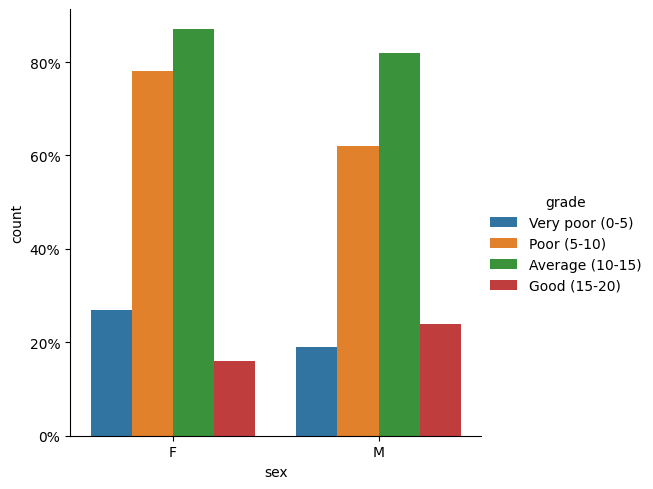

In [42]:
# sns.catplot(x = df_mat['sex'])
g = sns.catplot(x="sex", kind="count", data=df_mat, hue="grade")
for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(100))
plt.show()

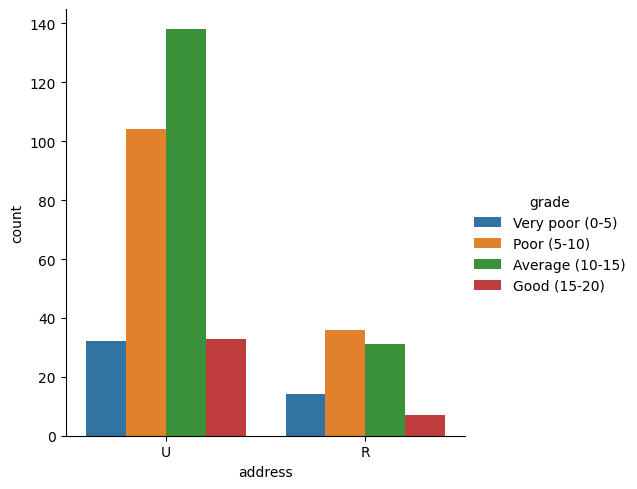

In [46]:
g = sns.catplot(x="address", kind="count", data=df_mat, hue="grade")
# for ax in g.axes.flat:
#     ax.yaxis.set_major_formatter(PercentFormatter(100))
plt.show()

In [ ]:
# Notebook (suggested name - notebook.ipynb) with
# Data preparation and data clearning
# EDA, feature importance analysis
# Model selection process and parameter tuning